In [1]:
import scanpy as sc
import scIB
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Test single metrics

In [2]:
exec(open("../../scIB/tests/test_metrics.py").read())

In [3]:
silhouette()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


HVG
Computed 2000 highly variable genes
PCA
score: 0.4586317799985409


In [4]:
silhouette_batch()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


HVG
Computed 2000 highly variable genes
PCA
score: 0.8823461493230633


In [5]:
nmi()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


HVG
Computed 2000 highly variable genes
PCA
Nearest Neigbours
optimised clustering against celltype
optimal cluster resolution: 2.0
optimal score: 0
0.41560816800426187
0.41560816800426187
0.4737798730063263
0.4651652698141881
0.47858062000017104
0.49020484188592744
0.4846479866852075
0.4964810373341038
0.49710453136476035
0.46956928239416057
0.4733542679480407
0.48225389656265083
0.48982466684743287
0.4921306983694545
0.4897684128059936
0.48595411017581963
0.48948244318431905
0.496719085597582
0.4933485080529454
0.4961456657520224


In [6]:
ari()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


HVG
Computed 2000 highly variable genes
PCA
Nearest Neigbours
score: 0.2542808537324477


In [7]:
pcr_comparison()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


covariate: batch
compute PCA n_comps: 50
covariate: batch
compute PCA n_comps: 50
no PCA precomputed: 8.744145626105751e-07


... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


covariate: batch
compute PCA n_comps: 50
covariate: batch
compute PCR on embeding n_comps: 50
using embedding: 8.744145626105751e-07


... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


HVG
Computed 2000 highly variable genes
PCA
covariate: batch
using existing PCA
covariate: batch
using existing PCA
precomputed PCA: 0.0


In [8]:
cell_cycle()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


batch: 3	 before: 0.21573320343859936	 after: 0.21573320343859936	 score: 1.0
batch: 4	 before: 0.21454074878095686	 after: 0.21454074878095686	 score: 1.0
batch: 1	 before: 0.20751503633299526	 after: 0.20751503633299526	 score: 1.0
batch: 2	 before: 0.23358703146732995	 after: 0.23358703146732995	 score: 1.0
score: 1.0


In [9]:
hvg_overlap()

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


score: 0.9984999999999999


AssertionError: 

## Test all metrics

In [10]:
exec(open("../../scIB/tests/utils.py").read())

In [11]:
adata = create_adata_dummy(pca=True, n_top_genes=2000, neighbors=True)

... storing 'paul15_clusters' as categorical
Trying to set attribute `.uns` of view, making a copy.


HVG
Computed 2000 highly variable genes
PCA
Nearest Neigbours


In [12]:
sc.tl.umap(adata)

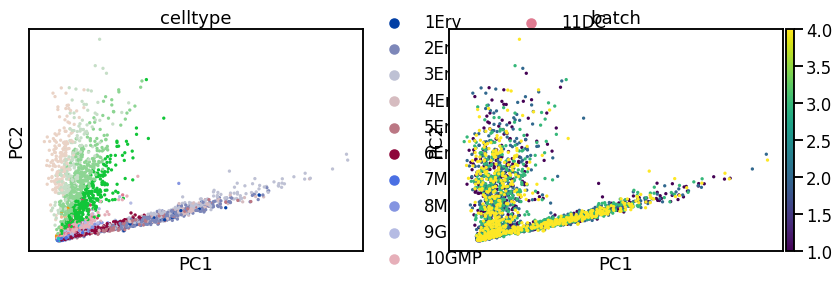

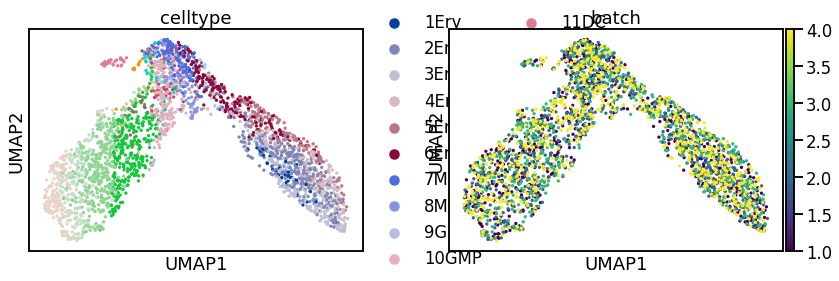

In [13]:
sc.pl.pca(adata, color=['celltype', 'batch'])
sc.pl.umap(adata, color=['celltype', 'batch'])

In [14]:
def create_integrated_dummy(adata, type_):
    """
    type_: one of 'full', 'embed', 'knn'
    """
    adata_int = adata.copy()
    
    if type_ == 'embed':
        pca = sc.tl.pca(adata_int, copy=True)
        adata_int.obsm['X_emb'] = pca.obsm['X_pca']
    elif type_ != 'full' and type_ != 'knn':
        raise ValueError(f"'{type_}' is not a valid output type")
    
    return adata_int

In [15]:
adata_int = create_integrated_dummy(adata, type_ = 'full')

In [16]:
n_hvgs = None
type_ = "full"
pca = True
neighbors = True
embed = 'X_pca'

if (type_ == "embed"):
    n_hvgs = None
    embed = "X_emb"
elif (type_ == "knn"):
    n_hvgs = None
    pca = False

print('reduce integrated data:')
print(f'    HVG selection:\t{n_hvgs}')
message = f'    neighbourhood graph:\t{neighbors}'
if neighbors:
    message += f' on {embed}'
print(message)
print(f'    PCA:\t{pca}')
scIB.preprocessing.reduce_data(adata_int, n_top_genes=n_hvgs,
                               neighbors=neighbors, use_rep=embed,
                               pca=pca, umap=False)
# METRICS
silhouette_ = True
nmi_ = True
ari_ = True
pcr_ = True
cell_cycle_ = True
kBET_ = True
lisi_ = True
if (type_ == "knn"):
    silhouette_ = False
    pcr_ = False
    cell_cycle_ = False

print(f'type:\t{type_}')
print(f'    ASW:\t{silhouette_}')
print(f'    NMI:\t{nmi_}')
print(f'    ARI:\t{ari_}')
print(f'    cell cycle:\t{cell_cycle_}')
print(f'    kBET:\t{kBET_}')
print(f'    LISI:\t{lisi_}')

reduce integrated data:
    HVG selection:	None
    neighbourhood graph:	True on X_pca
    PCA:	True
PCA
Nearest Neigbours
type:	full
    ASW:	True
    NMI:	True
    ARI:	True
    cell cycle:	True
    kBET:	True
    LISI:	True


In [17]:
scIB.me.metrics(adata, adata_int, verbose=False,
                hvgs=None,
                batch_key='batch', label_key='celltype',
                silhouette_=silhouette_, embed=embed,
                type_ = type_,
                nmi_=nmi_, nmi_method='arithmetic', nmi_dir=None,
                ari_=ari_,
                pcr_=pcr_,
                cell_cycle_=cell_cycle_, organism='mouse',
                kBET_=False, #kBET_,
                lisi_=lisi_
                )

clustering...
NMI...
ARI...
silhouette score...
PC regression...
(2730, 50)
(2730, 50)
cell cycle effect...


Trying to set attribute `.var` of view, making a copy.


(689, 2000)
(689, 3451)


Trying to set attribute `.var` of view, making a copy.


(690, 2000)
(690, 3451)


Trying to set attribute `.var` of view, making a copy.


(670, 1999)
(670, 3451)


Trying to set attribute `.var` of view, making a copy.


(681, 1999)
(681, 3451)
LISI score...


RRuntimeError: Error in compute_simpson_index(t(dknn$nn.dists), t(dknn$nn.idx) - 1, labels,  : 
  function 'enterRNGScope' not provided by package 'Rcpp'
Calls: <Anonymous> ... compute_lisi -> Reduce -> lapply -> FUN -> compute_simpson_index
